## Imports

In [6]:
#from book_rec_app import VespaApp
import pandas as pd
import openai
import os
from llm_model import LLM_Model
import numpy as np
from vespa.io import VespaResponse, VespaQueryResponse

## Deployment

In [2]:
app = VespaApp()

Waiting for configuration server, 0/60 seconds...
Waiting for configuration server, 5/60 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 0/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 5/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 10/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 15/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 20/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 25/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 30/300 seconds...
Using plain http against endpoint 

In [3]:
app.query_bm25('books about space travel')

,id,title,authors,description,categories
0,5879,"Have Space Suit, Will Travel",Robert A. Heinlein,"Teenager Clifford ""Kip"" Russell wins second pr...",Fiction
1,3770,The Best American Travel Writing 2006,Tim Cahill;Jason Wilson,Presents an anthology of the best <hi>travel</...,<hi>Travel</hi>
2,6742,There's No Toilet Paper... on the Road Less Tr...,Doug Lansky,A compendium of humorous <hi>travel</hi> writi...,<hi>Travel</hi>
3,6477,Australia and New Zealand on a Shoestring,Paul Smitz,At last - the two hottest stars on the <hi>tra...,<hi>Travel</hi>
4,3254,The Complete Science Fiction Treasury of H.G. ...,H. G. Wells,Includes fantasies of <hi>travel</hi> in time ...,"Science fiction, English."
5,6560,The Future of the Universe,A.J. Meadows,Many <hi>books</hi> have described how the uni...,Science
6,5087,The Poetics of Space,Gaston Bachelard,Shows how our perceptions of home shape our th...,Philosophy
7,3470,A Brief History of Time,Stephen Hawking,An anniversary edition of a now-classic survey...,Science
8,3263,Two Complete Novels,Douglas Adams,Following themes of zany <hi>space</hi> explor...,"Detective and mystery stories, English."
9,6495,Ministry of Space,Warren Ellis;Chris Weston;Laura DePuy,"In this alternative history tale, the British ...",Imperialism


In [4]:
app.query_hybrid('books about space travel')

,id,title
0,6560,The Future of the Universe
1,878,The Fabric of the Cosmos
2,3254,The Complete Science Fiction Treasury of H.G. ...
3,5879,"Have Space Suit, Will Travel"
4,4081,The More Than Complete Hitchhiker's Guide
5,3263,Two Complete Novels
6,2416,The Future of Spacetime
7,6677,Teleportation: From Star Trek to Tesla
8,6190,The Inner Reaches of Outer Space
9,5489,The Many Worlds of Magnus Ridolph


## Planilha Preenchimento Manual

In [87]:
with app.syncio(connections=12) as session:
    response_space_travel: VespaQueryResponse = session.query(
        hits=10,
        body={
            "yql": "select documentid, cord_uid, title, description, abstract from sources * where userQuery() LIMIT 100",
            "query": "books about space travel",
            "ranking.profile": "bm25",
            "presentation.timing": True,
        },
    )
    print(response_space_travel.json)

{'timing': {'querytime': 0.03, 'summaryfetchtime': 0.046, 'searchtime': 0.078}, 'root': {'id': 'toplevel', 'relevance': 1.0, 'fields': {'totalCount': 426}, 'coverage': {'coverage': 100, 'documents': 6483, 'full': True, 'nodes': 1, 'results': 1, 'resultsFull': 1}, 'children': [{'id': 'id:bookrec:doc::1416505490', 'relevance': 13.011441073719094, 'source': 'hybridsearchbv_content', 'fields': {'description': 'Teenager Clifford "Kip" Russell wins second prize in a soap jingle contest, a used worn spacesuit, and, while trying on his prize in his backyard, suddenly finds himself on a <hi>space</hi> odyssey as a prisoner aboard the ship of a <hi>space</hi> pirate, headed toward the Moon and a series of encounters with many bizarre creatures and situations. Reprint. 10,000 first printing.', 'documentid': 'id:bookrec:doc::1416505490', 'title': 'Have Space Suit, Will Travel'}}, {'id': 'id:bookrec:doc::0517052253', 'relevance': 11.603122304865535, 'source': 'hybridsearchbv_content', 'fields': {'d

In [56]:
%pip install openpyxl


  Using cached openpyxl-3.1.3-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl.metadata (1.8 kB)
Using cached openpyxl-3.1.3-py2.py3-none-any.whl (251 kB)
Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [88]:
response_json = response_space_travel.json

data = []
for item in response_json['root']['children']:
    title = item['fields']['title']
    description = item['fields']['description']
    binary = ''  # Empty value for the binary column
    score = ''   # Empty value for the score column
    data.append([title, description, binary, score])

df = pd.DataFrame(data, columns=['title', 'description', 'binary', 'score'])

df.to_excel('books_space_travel.xlsx', index=False)

print("Excel file 'books.xlsx' created successfully.")

Excel file 'books.xlsx' created successfully.


In [92]:
with app.syncio(connections=12) as session:
    response: VespaQueryResponse = session.query(
        hits=10,
        body={
            "yql": "select documentid, cord_uid, title, description, abstract from sources * where userQuery() LIMIT 100",
            "query": "books about romantic love",
            "ranking.profile": "bm25",
            "presentation.timing": True,
        },
    )
    print(response.json)

{'timing': {'querytime': 0.021, 'summaryfetchtime': 0.039, 'searchtime': 0.061}, 'root': {'id': 'toplevel', 'relevance': 1.0, 'fields': {'totalCount': 464}, 'coverage': {'coverage': 100, 'documents': 6483, 'full': True, 'nodes': 1, 'results': 1, 'resultsFull': 1}, 'children': [{'id': 'id:bookrec:doc::0394733525', 'relevance': 12.500838795907017, 'source': 'hybridsearchbv_content', 'fields': {'description': 'A mathematically oriented <hi>romantic</hi> fable <hi>about</hi> the eternal triangle, in this case a straight line who is hopelessly in <hi>love</hi> with a dot who in turn <hi>loves</hi> a squiggle', 'documentid': 'id:bookrec:doc::0394733525', 'title': 'The Dot and the Line'}}, {'id': 'id:bookrec:doc::0747575479', 'relevance': 11.760686926707198, 'source': 'hybridsearchbv_content', 'fields': {'description': 'This is a <hi>romantic</hi> comedy <hi>about</hi> the difficult, frustrating, awful, funny search for happiness in an American city where the primary emotion is unrequited <hi

In [93]:
# Assuming response_boy_talk_animals is a VespaQueryResponse object
response_json = response.json

# Extracting data
data = []
for item in response_json['root']['children']:
    title = item['fields']['title']
    description = item['fields']['description']
    binary = ''  # Empty value for the binary column
    score = ''   # Empty value for the score column
    data.append([title, description, binary, score])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['title', 'description', 'binary', 'score'])

# Saving to Excel
df.to_excel('books_romantic_love.xlsx', index=False)

print("Excel file 'books.xlsx' created successfully.")

Excel file 'books.xlsx' created successfully.


In [94]:
with app.syncio(connections=12) as session:
    response: VespaQueryResponse = session.query(
        hits=10,
        body={
            "yql": "select documentid, cord_uid, title, description, abstract from sources * where userQuery() LIMIT 100",
            "query": "books about wars",
            "ranking.profile": "bm25",
            "presentation.timing": True,
        },
    )
    print(response.json)

{'timing': {'querytime': 0.023, 'summaryfetchtime': 0.038, 'searchtime': 0.063}, 'root': {'id': 'toplevel', 'relevance': 1.0, 'fields': {'totalCount': 535}, 'coverage': {'coverage': 100, 'documents': 6483, 'full': True, 'nodes': 1, 'results': 1, 'resultsFull': 1}, 'children': [{'id': 'id:bookrec:doc::034547760X', 'relevance': 10.775374560786519, 'source': 'hybridsearchbv_content', 'fields': {'description': 'A comprehensive overview of alien beings from the "Star <hi>Wars</hi>" universe provides a physical description of the beings, a description of their homeworld, and where and when they appeared in the Star <hi>Wars</hi> films, novels, cartoon series, comic <hi>books</hi>, or videogames.', 'documentid': 'id:bookrec:doc::034547760X', 'title': 'Star Wars'}}, {'id': 'id:bookrec:doc::1590302257', 'relevance': 10.740315546590772, 'source': 'hybridsearchbv_content', 'fields': {'description': 'Written around the 6th century BC, The Art of <hi>War</hi> is one of the oldest <hi>books</hi> <hi

In [95]:
# Assuming response_boy_talk_animals is a VespaQueryResponse object
response_json = response.json

# Extracting data
data = []
for item in response_json['root']['children']:
    title = item['fields']['title']
    description = item['fields']['description']
    binary = ''  # Empty value for the binary column
    score = ''   # Empty value for the score column
    data.append([title, description, binary, score])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['title', 'description', 'binary', 'score'])

# Saving to Excel
df.to_excel('books_wars.xlsx', index=False)

print("Excel file 'books.xlsx' created successfully.")

Excel file 'books.xlsx' created successfully.


In [96]:
with app.syncio(connections=12) as session:
    response: VespaQueryResponse = session.query(
        hits=10,
        body={
            "yql": "select documentid, cord_uid, title, description, abstract from sources * where userQuery() LIMIT 100",
            "query": "books about cooking",
            "ranking.profile": "bm25",
            "presentation.timing": True,
        },
    )
    print(response.json)

{'timing': {'querytime': 0.017, 'summaryfetchtime': 0.05, 'searchtime': 0.069}, 'root': {'id': 'toplevel', 'relevance': 1.0, 'fields': {'totalCount': 524}, 'coverage': {'coverage': 100, 'documents': 6483, 'full': True, 'nodes': 1, 'results': 1, 'resultsFull': 1}, 'children': [{'id': 'id:bookrec:doc::0141010371', 'relevance': 11.101610430707503, 'source': 'hybridsearchbv_content', 'fields': {'description': "The No 1 bestseller I love this book. It's the very first thing I ever wrote, and I never thought the person worst at English in my school would end up writing a book. It's largely made up of recipes scribbled on the back of order forms and beer mats, collected together in a black bin liner that my wife almost threw away twice - it's a miracle this book ever came to be! Because of this book, a lot of blokes were henpecked into doing a bit of <hi>cooking</hi>. Good job too! The salad and pasta recipes are real winners, but the one people still talk <hi>about</hi> all the time is my pe

In [97]:
# Assuming response_boy_talk_animals is a VespaQueryResponse object
response_json = response.json

# Extracting data
data = []
for item in response_json['root']['children']:
    title = item['fields']['title']
    description = item['fields']['description']
    binary = ''  # Empty value for the binary column
    score = ''   # Empty value for the score column
    data.append([title, description, binary, score])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['title', 'description', 'binary', 'score'])

# Saving to Excel
df.to_excel('books_cooking.xlsx', index=False)

print("Excel file 'books.xlsx' created successfully.")

Excel file 'books.xlsx' created successfully.


In [98]:
with app.syncio(connections=12) as session:
    response: VespaQueryResponse = session.query(
        hits=10,
        body={
            "yql": "select documentid, cord_uid, title, description, abstract from sources * where userQuery() LIMIT 100",
            "query": "thriller books",
            "ranking.profile": "bm25",
            "presentation.timing": True,
        },
    )
    print(response.json)

{'timing': {'querytime': 0.016, 'summaryfetchtime': 0.135, 'searchtime': 0.153}, 'root': {'id': 'toplevel', 'relevance': 1.0, 'fields': {'totalCount': 294}, 'coverage': {'coverage': 100, 'documents': 6483, 'full': True, 'nodes': 1, 'results': 1, 'resultsFull': 1}, 'children': [{'id': 'id:bookrec:doc::1585675172', 'relevance': 7.574690245391311, 'source': 'hybridsearchbv_content', 'fields': {'description': 'Originally published to glowing reviews in 1972, Dow Mossman\'s extraordinary debut is a sweeping coming-of-age novel that developed a passionate cult following - even as it went out of print for more than twenty years. It recently inspired director Mark Moskowitz\'s award-winning documentary film Stone Reader, which was embraced by readers across the country and described by Peter Rainer in New York magazine as "a marvelous literary <hi>thriller</hi> that gets at the way <hi>books</hi> can stay with people forever."', 'documentid': 'id:bookrec:doc::1585675172', 'title': 'The Stones 

In [99]:
# Assuming response_boy_talk_animals is a VespaQueryResponse object
response_json = response.json

# Extracting data
data = []
for item in response_json['root']['children']:
    title = item['fields']['title']
    description = item['fields']['description']
    binary = ''  # Empty value for the binary column
    score = ''   # Empty value for the score column
    data.append([title, description, binary, score])

# Creating a DataFrame
df = pd.DataFrame(data, columns=['title', 'description', 'binary', 'score'])

# Saving to Excel
df.to_excel('books_thrillers.xlsx', index=False)

print("Excel file 'books.xlsx' created successfully.")

Excel file 'books.xlsx' created successfully.


## Teste automatizado modelo LLM

### Híbrido

In [221]:
#openai.api_key 

In [16]:
df = pd.read_csv("https://raw.githubusercontent.com/bernardovma/dados_livros/main/data.csv")
books_df = df.sample(n=200)
books_df = books_df[['title', 'description']]

In [201]:
llm_model = LLM_Model(openai.api_key)

In [27]:
def dcg(relevance_scores, p):
    relevance_scores = np.asfarray(relevance_scores)[:p]
    if relevance_scores.size:
        return np.sum(relevance_scores / np.log2(np.arange(2, relevance_scores.size + 2)))
    return 0.0

def ndcg(relevance_scores, p):
    dcg_p = dcg(relevance_scores, p)
    idcg_p = dcg(sorted(relevance_scores, reverse=True), p)
    if idcg_p == 0:
        return 0.0
    return dcg_p / idcg_p

In [54]:
results = {}
total_appearance_count = 0
total_questions = 0

for index, row in books_df.iterrows():
    title = row['title']
    print(f"Processing book: {title}")
    description = row['description']
    questions = llm_model.generate_generic_questions(title, description)
    
    results[title] = {
        "questions": questions,
        "appearance_count": 0,
        "total_questions": len(questions),
        "relevance_scores": []
    }
    
    for question in questions:
        search_results = app.query_hybrid(question)
        search_results_titles = list(search_results['title'])
        book_appears = title in search_results_titles
        results[title]["relevance_scores"].append(int(book_appears))
        if book_appears:
            results[title]["appearance_count"] += 1
    
    total_appearance_count += results[title]["appearance_count"]
    total_questions += results[title]["total_questions"]

Processing book: Triumph of the Darksword
Processing book: The Patron Saint of Liars
Processing book: Light
Processing book: My Sister's Keeper
Processing book: How to be Alone
Processing book: El Paso
Processing book: The Bluest Eye
Processing book: The Two Towers
Processing book: Gone for Good
Processing book: Blaming the Victims
Processing book: 五輪書 : 英文版
Processing book: Mister Monday
Processing book: Wilkins' Tooth
Processing book: Wild Magic
Processing book: Spellbound
Processing book: The A.B.C. Murders
Processing book: Six Easy Pieces
Processing book: The Purpose of Your Life
Processing book: I Capture the Castle
Processing book: Laughter in the Dark
Processing book: No More Dead Dogs
Processing book: Thin Air
Processing book: Does Anybody Have a Problem with That?
Processing book: God Knows
Processing book: Fear of Fifty
Processing book: Alone
Processing book: In the Lake of the Woods
Processing book: The Meanest Doll in the World
Processing book: Runaways
Processing book: A W

In [55]:
if total_questions > 0:
    overall_percentage_hybrid = (total_appearance_count / total_questions) * 100
else:
    overall_percentage_hybrid = 0

print(f"Overall percentage: {overall_percentage_hybrid:.2f}%")

Overall percentage: 30.11%


In [56]:
ndcg_scores_hybrid = {}
p = 10  # Define the position at which NDCG is calculated
for title, data in results.items():
    relevance_scores = data["relevance_scores"]
    ndcg_scores_hybrid[title] = ndcg(relevance_scores, p)

# Optional: Calculate the mean NDCG score across all books
mean_ndcg_hybrid = np.mean(list(ndcg_scores_hybrid.values()))
print(f"Mean NDCG@{p} across all books: {mean_ndcg_hybrid:.4f}")

Mean NDCG@10 across all books: 0.4184


### BM_25

In [ ]:
results_bm_25 = {}
total_appearance_count_bm_25 = 0
total_questions_bm_25 = 0

In [36]:
if results_bm_25:
    last_title = list(results_bm_25.keys())[-1]
    last_book_data = results_bm_25.pop(last_title)
    total_appearance_count_bm_25 -= last_book_data["appearance_count"]
    total_questions_bm_25 -= last_book_data["total_questions"]


start_index = len(results_bm_25)
books_to_process = books_df.iloc[start_index:]

for index, row in books_to_process.iterrows():
    title = row['title']
    print(f"Processing book: {title}")
    description = row['description']
    questions_bm_25 = llm_model.generate_generic_questions(title, description)
    
    results_bm_25[title] = {
        "questions": questions_bm_25,
        "appearance_count": 0,
        "total_questions": len(questions_bm_25),
        "relevance_scores": []
    }
    
    for question in questions_bm_25:
        search_results_bm_25 = app.query_bm25(question)
        search_results_titles_bm_25 = list(search_results_bm_25['title'])
        book_appears_bm_25 = title in search_results_titles_bm_25
        results_bm_25[title]["relevance_scores"].append(int(book_appears_bm_25))
        if book_appears_bm_25:
            results_bm_25[title]["appearance_count"] += 1
    
    total_appearance_count_bm_25 += results_bm_25[title]["appearance_count"]
    total_questions_bm_25 += results_bm_25[title]["total_questions"]

Processing book: The Puppet and the Dwarf
Processing book: A Power Governments Cannot Suppress
Processing book: Discourse on the Origin of Inequality
Processing book: A Farewell to Arms
Processing book: The Portrait of a Lady
Processing book: The Heidi Chronicles
Processing book: Robert Langdon Novels
Processing book: The Price of the Ticket
Processing book: A Chosen Few
Processing book: The Greenlander
Processing book: The Stranger Beside Me
Processing book: King of the Vagabonds
Processing book: A Spy In The House Of Love
Processing book: The Devilish Pleasures of a Duke


In [39]:
if total_questions_bm_25 > 0:
    overall_percentage_bm_25 = (total_appearance_count_bm_25 / total_questions_bm_25) * 100
else:
    overall_percentage_bm_25 = 0

print(f"Overall percentage: {overall_percentage_bm_25:.2f}%")

Overall percentage: 35.94%


In [52]:
ndcg_scores_bm_25 = {}
p = 10  # Define the position at which NDCG is calculated
for title, data in results_bm_25.items():
    relevance_scores = data["relevance_scores"]
    ndcg_scores_bm_25[title] = ndcg(relevance_scores, p)

# Optional: Calculate the mean NDCG score across all books
mean_ndcg_bm_25 = np.mean(list(ndcg_scores_bm_25.values()))
print(f"Mean NDCG@{p} across all books: {mean_ndcg_bm_25:.4f}")

Mean NDCG@10 across all books: 0.4557


### Semântico

In [48]:
results_semantico = {}
total_appearance_count_semantico = 0
total_questions_bm_semantico = 0

In [49]:
if results_semantico:
    last_title = list(results_semantico.keys())[-1]
    last_book_data = results_semantico.pop(last_title)
    total_appearance_count_semantico -= last_book_data["appearance_count"]
    total_questions_bm_semantico -= last_book_data["total_questions"]


start_index = len(results_semantico)
books_to_process = books_df.iloc[start_index:]

for index, row in books_to_process.iterrows():
    title = row['title']
    print(f"Processing book: {title}")
    description = row['description']
    questions_semantico = llm_model.generate_generic_questions(title, description)
    
    results_semantico[title] = {
        "questions": questions_semantico,
        "appearance_count": 0,
        "total_questions": len(questions_semantico),
        "relevance_scores": []
    }
    
    for question in questions_semantico:
        search_results_semantico = app.query_semantic(question)
        search_results_titles_semantico = list(search_results_semantico['title'])
        book_appears_semantico = title in search_results_titles_semantico
        results_semantico[title]["relevance_scores"].append(int(book_appears_semantico))
        if book_appears_semantico:
            results_semantico[title]["appearance_count"] += 1
    
    total_appearance_count_semantico += results_semantico[title]["appearance_count"]
    total_questions_bm_semantico += results_semantico[title]["total_questions"]

Processing book: Triumph of the Darksword
Processing book: The Patron Saint of Liars
Processing book: Light
Processing book: My Sister's Keeper
Processing book: How to be Alone
Processing book: El Paso
Processing book: The Bluest Eye
Processing book: The Two Towers
Processing book: Gone for Good
Processing book: Blaming the Victims
Processing book: 五輪書 : 英文版
Processing book: Mister Monday
Processing book: Wilkins' Tooth
Processing book: Wild Magic
Processing book: Spellbound
Processing book: The A.B.C. Murders
Processing book: Six Easy Pieces
Processing book: The Purpose of Your Life
Processing book: I Capture the Castle
Processing book: Laughter in the Dark
Processing book: No More Dead Dogs
Processing book: Thin Air
Processing book: Does Anybody Have a Problem with That?
Processing book: God Knows
Processing book: Fear of Fifty
Processing book: Alone
Processing book: In the Lake of the Woods
Processing book: The Meanest Doll in the World
Processing book: Runaways
Processing book: A W

In [50]:
if total_questions_bm_semantico > 0:
    overall_percentage_semantic = (total_appearance_count_semantico/ total_questions_bm_semantico) * 100
else:
    overall_percentage_semantic = 0

print(f"Overall percentage: {overall_percentage_semantic:.2f}%")

Overall percentage: 28.68%


In [57]:
ndcg_scores_semantic = {}
p = 10  # Define the position at which NDCG is calculated
for title, data in results_semantico.items():
    relevance_scores = data["relevance_scores"]
    ndcg_scores_semantic[title] = ndcg(relevance_scores, p)

# Optional: Calculate the mean NDCG score across all books
mean_ndcg_semantic = np.mean(list(ndcg_scores_semantic.values()))
print(f"Mean NDCG@{p} across all books: {mean_ndcg_semantic:.4f}")

Mean NDCG@10 across all books: 0.3779


### Plots

In [58]:
import matplotlib.pyplot as plt

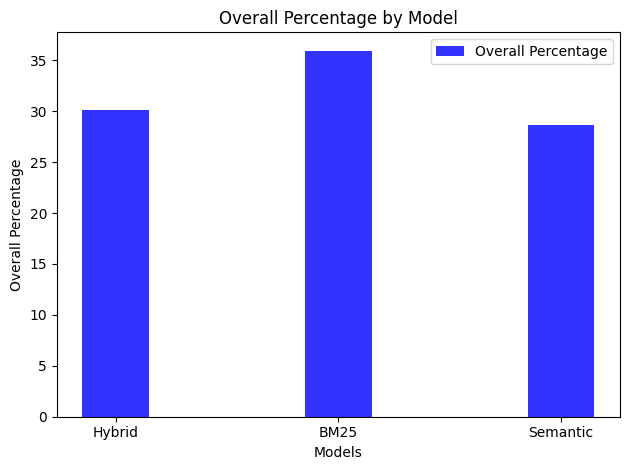

In [59]:
#plot bar graph for the three overall percentages
fig, ax = plt.subplots()
bar_width = 0.3
opacity = 0.8
index = np.arange(3)
rects1 = plt.bar(index, [overall_percentage_hybrid, overall_percentage_bm_25, overall_percentage_semantic], bar_width, alpha=opacity, color='b', label='Overall Percentage')
plt.xlabel('Models')
plt.ylabel('Overall Percentage')
plt.title('Overall Percentage by Model')
plt.xticks(index, ['Hybrid', 'BM25', 'Semantic'])
plt.legend()
plt.tight_layout()
plt.show()


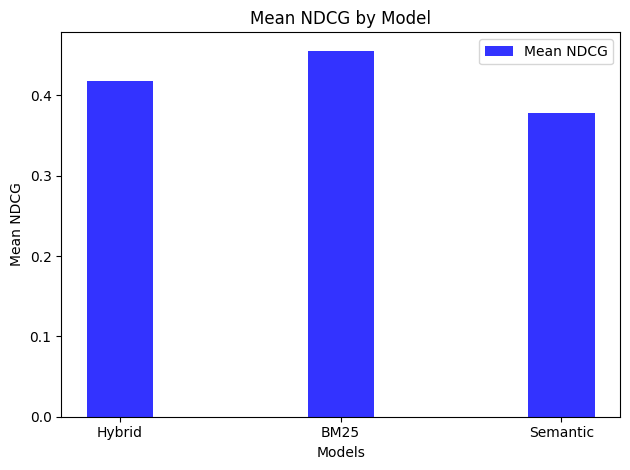

In [60]:
fig, ax = plt.subplots()
bar_width = 0.3
opacity = 0.8
index = np.arange(3)
rects1 = plt.bar(index, [mean_ndcg_hybrid, mean_ndcg_bm_25, mean_ndcg_semantic], bar_width, alpha=opacity, color='b', label='Mean NDCG')
plt.xlabel('Models')
plt.ylabel('Mean NDCG')
plt.title('Mean NDCG by Model')
plt.xticks(index, ['Hybrid', 'BM25', 'Semantic'])
plt.legend()
plt.tight_layout()
plt.show()

## Teste 2

### BM_25

In [1]:
import docker
from vespa.io import VespaResponse, VespaQueryResponse
from vespa.package import (
    ApplicationPackage,
    Field,
    Schema,
    Document,
    HNSW,
    RankProfile,
    Component,
    Parameter,
    FieldSet,
    GlobalPhaseRanking,
    Function,
)
from vespa.deployment import VespaDocker
import pandas as pd
import numpy as np

In [2]:
package = ApplicationPackage(
    name="hybridsearchbv",
    schema=[
        Schema(
            name="doc",
            document=Document(
                fields=[
                    Field(name="id", type="string", indexing=["summary"]),
                    Field(
                        name="title",
                        type="string",
                        indexing=["index", "summary"],
                        index="enable-bm25",
                    ),
                    Field(
                        name="authors",
                        type="string",
                        indexing=["index", "summary"],
                        index="enable-bm25",
                        bolding=True,
                    ),
                    Field(
                        name="description",
                        type="string",
                        indexing=["index", "summary"],
                        index="enable-bm25",
                        bolding=True,
                    ),
                    Field(
                        name="categories",
                        type="string",
                        indexing=["index", "summary"],
                        index="enable-bm25",
                        bolding=True,
                    ),
                    Field(
                        name="embedding",
                        type="tensor<float>(x[384])",
                        indexing=[
                            'input authors . " " . input description . " " . input categories',
                            "embed",
                            "index",
                            "attribute",
                        ],
                        ann=HNSW(distance_metric="angular"),
                        is_document_field=False,
                    ),
                ]
            ),
            fieldsets=[FieldSet(name="default", fields=["title", "authors", "description", "categories"])],
            rank_profiles=[
                RankProfile(
                    name="bm25",
                    inputs=[("query(q)", "tensor<float>(x[384])")],
                    functions=[
                        Function(name="bm25sum", expression="bm25(authors) + bm25(description) + bm25(categories)")
                    ],
                    first_phase="bm25sum",
                ),
                RankProfile(
                    name="semantic",
                    inputs=[("query(q)", "tensor<float>(x[384])")],
                    first_phase="closeness(field, embedding)",
                ),
                RankProfile(
                    name="fusion",
                    inherits="bm25",
                    inputs=[("query(q)", "tensor<float>(x[384])")],
                    first_phase="closeness(field, embedding)",
                    global_phase=GlobalPhaseRanking(
                        expression="reciprocal_rank_fusion(bm25sum, closeness(field, embedding))",
                        rerank_count=1000,
                    ),
                ),
            ],
        )
    ],
    components=[
        Component(
            id="e5",
            type="hugging-face-embedder",
            parameters=[
                Parameter(
                    "transformer-model",
                    {
                        "url": "https://github.com/vespa-engine/sample-apps/raw/master/simple-semantic-search/model/e5-small-v2-int8.onnx"
                    },
                ),
                Parameter(
                    "tokenizer-model",
                    {
                        "url": "https://raw.githubusercontent.com/vespa-engine/sample-apps/master/simple-semantic-search/model/tokenizer.json"
                    },
                ),
            ],
        )
    ],
)

In [3]:
vespa_docker = VespaDocker()
app = vespa_docker.deploy(application_package=package)

Waiting for configuration server, 0/60 seconds...
Waiting for configuration server, 5/60 seconds...
Waiting for configuration server, 10/60 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 0/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 5/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 10/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 15/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 20/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 25/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 3

In [4]:
def transform_row(row):
    return {
        "id": row["id"],
        "fields": {"title": row["title"], "authors": row["authors"], "description": row["description"], "categories": row["categories"], "id": row["id"]},
    }

In [5]:
def callback(response:VespaResponse, id:str):
    if not response.is_successful():
        print(f"Error when feeding document {id}: {response.get_json()}")

In [6]:
df = pd.read_csv("https://raw.githubusercontent.com/bernardovma/dados_livros/main/data.csv")
df['id'] = range(1, len(df) + 1)
df = df.fillna("")
vespa_feed = df.apply(transform_row, axis=1).tolist()

app.feed_iterable(vespa_feed, schema="doc", namespace="bookrec", callback=callback)

In [7]:
def hits_as_df(response, fields):
    records = []
    for hit in response.hits:
        record = {}
        for field in fields:
            record[field] = hit['fields'].get(field, None) 
        records.append(record)
    return pd.DataFrame(records)

In [51]:
def query_bm25_initial(query, limit = 10):
    with app.syncio(connections=12) as session:
            response:VespaQueryResponse = session.query(
                yql=f"select * from sources * where userQuery() limit {limit}",
                query=query,
                ranking="bm25"
            )
            assert(response.is_successful())

    return hits_as_df(response, ['id', 'title', 'authors', 'description', 'categories'])


def query_semantic_initial(input_query):
    with app.syncio(connections=12) as session:
        query = input_query
        response: VespaQueryResponse = session.query(
            yql="select * from sources * where ({targetHits:1000}nearestNeighbor(embedding,q)) limit 10",
            query=query,
            ranking="semantic",
            body={"input.query(q)": f"embed({query})"},
        )
        assert response.is_successful()

    return hits_as_df(response, ['id', 'title', 'authors', 'description', 'categories'])


def query_hybrid_initial(input_query):
    with app.syncio(connections=25) as session:
        query = input_query
        response: VespaQueryResponse = session.query(
            yql="select * from sources * where userQuery() or ({targetHits:1000}nearestNeighbor(embedding,q)) limit 10",
            query=query,
            ranking="fusion",
            body={"input.query(q)": f"embed({query})"},
        )
        assert response.is_successful()

    return hits_as_df(response, ['id', 'title', 'authors', 'description', 'categories']) 

In [13]:
teste_df = df.sample(n=100)
teste_df = teste_df[['title', 'description']]

In [37]:
def generate_generic_questions(book_title, book_description):
    prompt = f"Generate three generic questions about any book, given the following book titled '{book_title}' with this description: '{book_description}'. The questions should be broad and not specific, not giving away the book title, being more general and applicable to other books, but at the same time giving elements to discuss the book."
    messages = [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": prompt}
    ]
    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages,
        max_tokens=150,
        temperature=0.7,
    )
    questions = response.choices[0].message.content.strip().split("\n")
    return [q for q in questions if q]

In [35]:
results_bm_25 = {}
total_appearance_count_bm_25 = 0
total_questions_bm_25 = 0

In [43]:
if results_bm_25:
    last_title = list(results_bm_25.keys())[-1]
    last_book_data = results_bm_25.pop(last_title)
    total_appearance_count_bm_25 -= last_book_data["appearance_count"]
    total_questions_bm_25 -= last_book_data["total_questions"]


start_index = len(results_bm_25)
books_to_process = teste_df.iloc[start_index:]

for index, row in books_to_process.iterrows():
    title = row['title']
    print(f"Processing book: {title}")
    description = row['description']
    questions_bm_25 = generate_generic_questions(title, description)
    
    results_bm_25[title] = {
        "questions": questions_bm_25,
        "appearance_count": 0,
        "total_questions": len(questions_bm_25),
        "relevance_scores": []
    }
    
    for question in questions_bm_25:
        search_results_bm_25 = query_bm25(question)
        search_results_titles_bm_25 = list(search_results_bm_25['title'])
        book_appears_bm_25 = title in search_results_titles_bm_25
        results_bm_25[title]["relevance_scores"].append(int(book_appears_bm_25))
        if book_appears_bm_25:
            results_bm_25[title]["appearance_count"] += 1
    
    total_appearance_count_bm_25 += results_bm_25[title]["appearance_count"]
    total_questions_bm_25 += results_bm_25[title]["total_questions"]

Processing book: The Poetry of Sylvia Plath
Processing book: Zero
Processing book: The Walking Dead
Processing book: Dead Air
Processing book: Bored of the Rings


In [44]:
if total_questions_bm_25 > 0:
    overall_percentage_bm_25 = (total_appearance_count_bm_25 / total_questions_bm_25) * 100
else:
    overall_percentage_bm_25 = 0

print(f"Overall percentage: {overall_percentage_bm_25:.2f}%")

Overall percentage: 35.96%


In [46]:
def dcg(relevance_scores, p):
    relevance_scores = np.asfarray(relevance_scores)[:p]
    if relevance_scores.size:
        return np.sum(relevance_scores / np.log2(np.arange(2, relevance_scores.size + 2)))
    return 0.0

def ndcg(relevance_scores, p):
    dcg_p = dcg(relevance_scores, p)
    idcg_p = dcg(sorted(relevance_scores, reverse=True), p)
    if idcg_p == 0:
        return 0.0
    return dcg_p / idcg_p

In [47]:
ndcg_scores_bm_25 = {}
p = 10  # Define the position at which NDCG is calculated
for title, data in results_bm_25.items():
    relevance_scores = data["relevance_scores"]
    ndcg_scores_bm_25[title] = ndcg(relevance_scores, p)

# Optional: Calculate the mean NDCG score across all books
mean_ndcg_bm_25 = np.mean(list(ndcg_scores_bm_25.values()))
print(f"Mean NDCG@{p} across all books: {mean_ndcg_bm_25:.4f}")

Mean NDCG@10 across all books: 0.4870


### Hybrid

In [49]:
results = {}
total_appearance_count = 0
total_questions = 0

for index, row in teste_df.iterrows():
    title = row['title']
    print(f"Processing book: {title}")
    description = row['description']
    questions = generate_generic_questions(title, description)
    
    results[title] = {
        "questions": questions,
        "appearance_count": 0,
        "total_questions": len(questions),
        "relevance_scores": []
    }
    
    for question in questions:
        search_results = query_hybrid(question)
        search_results_titles = list(search_results['title'])
        book_appears = title in search_results_titles
        results[title]["relevance_scores"].append(int(book_appears))
        if book_appears:
            results[title]["appearance_count"] += 1
    
    total_appearance_count += results[title]["appearance_count"]
    total_questions += results[title]["total_questions"]

Processing book: Not Much Fun
Processing book: A Man of the People
Processing book: The Complete Idiot's Guide to World Religions
Processing book: The Chaneysville Incident
Processing book: Tomie
Processing book: The Invisibles, the Invisible Kingdom
Processing book: The Farthest Shore
Processing book: Field Guide to Home Buying in America
Processing book: The Professor and the Madman
Processing book: Nixon Agonistes
Processing book: Me Talk Pretty One Day
Processing book: The Guardian
Processing book: A Midsummer Night's Dream
Processing book: West Africa
Processing book: The Day of the Tempest
Processing book: The Good Earth
Processing book: Hamlet's Mill
Processing book: Pirates of the Caribbean: The Sword of Cortes - Jack Sparrow #4
Processing book: Rameau's Nephew / D'alembert's Dream
Processing book: A Dirty Job
Processing book: Confessions of an Ugly Stepsister
Processing book: The All-true Travels and Adventures of Lidie Newton
Processing book: Alice in Wonderland
Processing bo

In [50]:
if total_questions > 0:
    overall_percentage = (total_appearance_count / total_questions) * 100
else:
    overall_percentage = 0

print(f"Overall percentage: {overall_percentage:.2f}%")

Overall percentage: 29.08%


In [51]:
ndcg_scores = {}
p = 10  # Define the position at which NDCG is calculated
for title, data in results.items():
    relevance_scores = data["relevance_scores"]
    ndcg_scores[title] = ndcg(relevance_scores, p)

# Optional: Calculate the mean NDCG score across all books
mean_ndcg = np.mean(list(ndcg_scores.values()))
print(f"Mean NDCG@{p} across all books: {mean_ndcg:.4f}")

Mean NDCG@10 across all books: 0.4034


### Semântico

In [53]:
results_semantico = {}
total_appearance_count_semantico = 0
total_questions_bm_semantico = 0

In [54]:
if results_semantico:
    last_title = list(results_semantico.keys())[-1]
    last_book_data = results_semantico.pop(last_title)
    total_appearance_count_semantico -= last_book_data["appearance_count"]
    total_questions_bm_semantico -= last_book_data["total_questions"]


start_index = len(results_semantico)
books_to_process = teste_df.iloc[start_index:]

for index, row in books_to_process.iterrows():
    title = row['title']
    print(f"Processing book: {title}")
    description = row['description']
    questions_semantico = generate_generic_questions(title, description)
    
    results_semantico[title] = {
        "questions": questions_semantico,
        "appearance_count": 0,
        "total_questions": len(questions_semantico),
        "relevance_scores": []
    }
    
    for question in questions_semantico:
        search_results_semantico = query_semantic(question)
        search_results_titles_semantico = list(search_results_semantico['title'])
        book_appears_semantico = title in search_results_titles_semantico
        results_semantico[title]["relevance_scores"].append(int(book_appears_semantico))
        if book_appears_semantico:
            results_semantico[title]["appearance_count"] += 1
    
    total_appearance_count_semantico += results_semantico[title]["appearance_count"]
    total_questions_bm_semantico += results_semantico[title]["total_questions"]

Processing book: Not Much Fun
Processing book: A Man of the People
Processing book: The Complete Idiot's Guide to World Religions
Processing book: The Chaneysville Incident
Processing book: Tomie
Processing book: The Invisibles, the Invisible Kingdom
Processing book: The Farthest Shore
Processing book: Field Guide to Home Buying in America
Processing book: The Professor and the Madman
Processing book: Nixon Agonistes
Processing book: Me Talk Pretty One Day
Processing book: The Guardian
Processing book: A Midsummer Night's Dream
Processing book: West Africa
Processing book: The Day of the Tempest
Processing book: The Good Earth
Processing book: Hamlet's Mill
Processing book: Pirates of the Caribbean: The Sword of Cortes - Jack Sparrow #4
Processing book: Rameau's Nephew / D'alembert's Dream
Processing book: A Dirty Job
Processing book: Confessions of an Ugly Stepsister
Processing book: The All-true Travels and Adventures of Lidie Newton
Processing book: Alice in Wonderland
Processing bo

In [55]:
if total_questions_bm_semantico > 0:
    overall_percentage_semantic = (total_appearance_count_semantico/ total_questions_bm_semantico) * 100
else:
    overall_percentage_semantic = 0

print(f"Overall percentage: {overall_percentage_semantic:.2f}%")

Overall percentage: 30.35%


In [56]:
ndcg_scores_semantic = {}
p = 10  # Define the position at which NDCG is calculated
for title, data in results_semantico.items():
    relevance_scores = data["relevance_scores"]
    ndcg_scores_semantic[title] = ndcg(relevance_scores, p)

# Optional: Calculate the mean NDCG score across all books
mean_ndcg_semantic = np.mean(list(ndcg_scores_semantic.values()))
print(f"Mean NDCG@{p} across all books: {mean_ndcg_semantic:.4f}")

Mean NDCG@10 across all books: 0.4127


### Plots

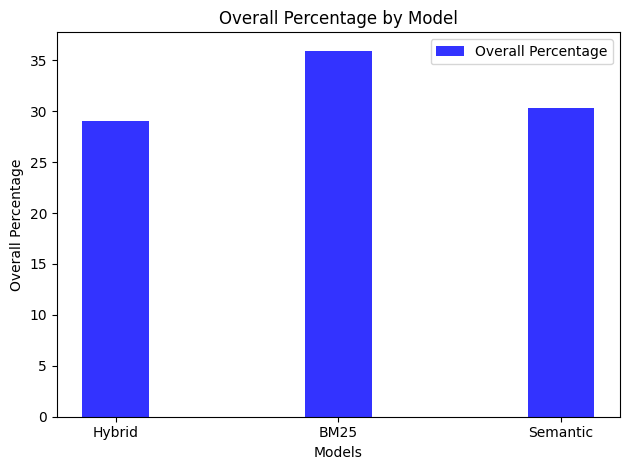

In [60]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
bar_width = 0.3
opacity = 0.8
index = np.arange(3)
rects1 = plt.bar(index, [overall_percentage, overall_percentage_bm_25, overall_percentage_semantic], bar_width, alpha=opacity, color='b', label='Overall Percentage')
plt.xlabel('Models')
plt.ylabel('Overall Percentage')
plt.title('Overall Percentage by Model')
plt.xticks(index, ['Hybrid', 'BM25', 'Semantic'])
plt.legend()
plt.tight_layout()
plt.show()


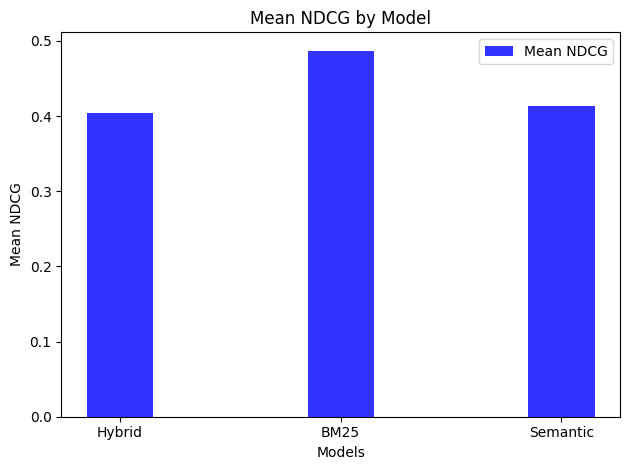

In [61]:
fig, ax = plt.subplots()
bar_width = 0.3
opacity = 0.8
index = np.arange(3)
rects1 = plt.bar(index, [mean_ndcg, mean_ndcg_bm_25, mean_ndcg_semantic], bar_width, alpha=opacity, color='b', label='Mean NDCG')
plt.xlabel('Models')
plt.ylabel('Mean NDCG')
plt.title('Mean NDCG by Model')
plt.xticks(index, ['Hybrid', 'BM25', 'Semantic'])
plt.legend()
plt.tight_layout()
plt.show()

## Teste 3

### BM_25

In [7]:
package = ApplicationPackage(
    name="hybridsearchbv",
    schema=[
        Schema(
            name="doc",
            document=Document(
                fields=[
                    Field(name="id", type="string", indexing=["summary"]),
                    Field(
                        name="title",
                        type="string",
                        indexing=["index", "summary"],
                        index="enable-bm25",
                    ),
                    Field(
                        name="authors",
                        type="string",
                        indexing=["index", "summary"],
                        index="enable-bm25",
                        bolding=True,
                    ),
                    Field(
                        name="description",
                        type="string",
                        indexing=["index", "summary"],
                        index="enable-bm25",
                        bolding=True,
                    ),
                    Field(
                        name="categories",
                        type="string",
                        indexing=["index", "summary"],
                        index="enable-bm25",
                        bolding=True,
                    ),
                    Field(
                        name="embedding",
                        type="tensor<float>(x[384])",
                        indexing=[
                            'input description . " " . input categories',
                            "embed",
                            "index",
                            "attribute",
                        ],
                        ann=HNSW(distance_metric="angular"),
                        is_document_field=False,
                    ),
                ]
            ),
            fieldsets=[FieldSet(name="default", fields=["title", "authors", "description", "categories"])],
            rank_profiles=[
                RankProfile(
                    name="bm25",
                    inputs=[("query(q)", "tensor<float>(x[384])")],
                    functions=[
                        Function(name="bm25sum", expression="bm25(description) + bm25(categories)")
                    ],
                    first_phase="bm25sum",
                ),
                RankProfile(
                    name="semantic",
                    inputs=[("query(q)", "tensor<float>(x[384])")],
                    first_phase="closeness(field, embedding)",
                ),
                RankProfile(
                    name="fusion",
                    inherits="bm25",
                    inputs=[("query(q)", "tensor<float>(x[384])")],
                    first_phase="closeness(field, embedding)",
                    global_phase=GlobalPhaseRanking(
                        expression="reciprocal_rank_fusion(bm25sum, closeness(field, embedding))",
                        rerank_count=1000,
                    ),
                ),
            ],
        )
    ],
    components=[
        Component(
            id="e5",
            type="hugging-face-embedder",
            parameters=[
                Parameter(
                    "transformer-model",
                    {
                        "url": "https://github.com/vespa-engine/sample-apps/raw/master/simple-semantic-search/model/e5-small-v2-int8.onnx"
                    },
                ),
                Parameter(
                    "tokenizer-model",
                    {
                        "url": "https://raw.githubusercontent.com/vespa-engine/sample-apps/master/simple-semantic-search/model/tokenizer.json"
                    },
                ),
            ],
        )
    ],
)

In [8]:
vespa_docker = VespaDocker()
app = vespa_docker.deploy(application_package=package)

Waiting for configuration server, 0/60 seconds...
Waiting for configuration server, 5/60 seconds...
Waiting for configuration server, 10/60 seconds...
Waiting for configuration server, 15/60 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 0/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 5/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 10/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 15/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 20/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 25/300 seconds...
Using plain http against endpoint http://localhost:8080/

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/bernardovma/dados_livros/main/data.csv")
df['id'] = range(1, len(df) + 1)
df = df.fillna("")
vespa_feed = df.apply(transform_row, axis=1).tolist()

app.feed_iterable(vespa_feed, schema="doc", namespace="bookrec", callback=callback)

In [11]:
query_hybrid('books about space travel')

,id,title,authors,description,categories
0,3254,The Complete Science Fiction Treasury of H.G. ...,H. G. Wells,Includes fantasies of <hi>travel</hi> in time ...,"Science fiction, English."
1,6677,Teleportation: From Star Trek to Tesla,Commander X;Tim Swartz,"NOW YOU CAN <hi>TRAVEL</hi> UP, UP and AWAY......","Body, Mind & Spirit"
2,878,The Fabric of the Cosmos,Brian Greene,From the bestselling author of The Elegant Uni...,Science
3,5327,Gabriel Garcia Marquez's Love in the Time of C...,Tom Fahy,"A brilliant idea--short, perceptive <hi>books<...",Literary Criticism
4,6560,The Future of the Universe,A.J. Meadows,Many <hi>books</hi> have described how the uni...,Science
5,3436,Triumph of the Darksword,Margaret Weis;Tracy Hickman,Science fiction.,Fiction
6,4237,The Time Machine,Herbert George Wells,None,"Science fiction, English"
7,3263,Two Complete Novels,Douglas Adams,Following themes of zany <hi>space</hi> explor...,"Detective and mystery stories, English."
8,1935,"Star Trek, the Animated Series",Alan Dean Foster,None,Star trek fiction
9,1813,"Life, the Universe and Everything",Douglas Adams,Arthur Dent and Ford Prefect learn why Earth h...,Fiction


In [65]:
results_bm_25 = {}
total_appearance_count_bm_25 = 0
total_questions_bm_25 = 0

In [76]:
if results_bm_25:
    last_title = list(results_bm_25.keys())[-1]
    last_book_data = results_bm_25.pop(last_title)
    total_appearance_count_bm_25 -= last_book_data["appearance_count"]
    total_questions_bm_25 -= last_book_data["total_questions"]


start_index = len(results_bm_25)
books_to_process = teste_df.iloc[start_index:]

for index, row in books_to_process.iterrows():
    title = row['title']
    print(f"Processing book: {title}")
    description = row['description']
    questions_bm_25 = generate_generic_questions(title, description)
    
    results_bm_25[title] = {
        "questions": questions_bm_25,
        "appearance_count": 0,
        "total_questions": len(questions_bm_25),
        "relevance_scores": []
    }
    
    for question in questions_bm_25:
        search_results_bm_25 = query_bm25(question)
        search_results_titles_bm_25 = list(search_results_bm_25['title'])
        book_appears_bm_25 = title in search_results_titles_bm_25
        results_bm_25[title]["relevance_scores"].append(int(book_appears_bm_25))
        if book_appears_bm_25:
            results_bm_25[title]["appearance_count"] += 1
    
    total_appearance_count_bm_25 += results_bm_25[title]["appearance_count"]
    total_questions_bm_25 += results_bm_25[title]["total_questions"]

Processing book: Plagues and peoples
Processing book: Brando Unzipped
Processing book: No One is Illegal
Processing book: The Transition of H.P. Lovecraft
Processing book: Everything on a Waffle
Processing book: Winston S. Churchill
Processing book: The Poetry of Sylvia Plath
Processing book: Zero
Processing book: The Walking Dead
Processing book: Dead Air
Processing book: Bored of the Rings


In [77]:
if total_questions_bm_25 > 0:
    overall_percentage_bm_25 = (total_appearance_count_bm_25 / total_questions_bm_25) * 100
else:
    overall_percentage_bm_25 = 0

print(f"Overall percentage: {overall_percentage_bm_25:.2f}%")

Overall percentage: 46.43%


In [78]:
ndcg_scores_bm_25 = {}
p = 10  # Define the position at which NDCG is calculated
for title, data in results_bm_25.items():
    relevance_scores = data["relevance_scores"]
    ndcg_scores_bm_25[title] = ndcg(relevance_scores, p)

# Optional: Calculate the mean NDCG score across all books
mean_ndcg_bm_25 = np.mean(list(ndcg_scores_bm_25.values()))
print(f"Mean NDCG@{p} across all books: {mean_ndcg_bm_25:.4f}")

Mean NDCG@10 across all books: 0.5298


### Hybrid

In [25]:
results = {}
total_appearance_count = 0
total_questions = 0

for index, row in teste_df.iterrows():
    title = row['title']
    print(f"Processing book: {title}")
    description = row['description']
    questions = llm_model.generate_generic_questions(title, description)
    
    results[title] = {
        "questions": questions,
        "appearance_count": 0,
        "total_questions": len(questions),
        "relevance_scores": []
    }
    
    for question in questions:
        search_results = query_hybrid(question)
        search_results_titles = list(search_results['title'])
        book_appears = title in search_results_titles
        results[title]["relevance_scores"].append(int(book_appears))
        if book_appears:
            results[title]["appearance_count"] += 1
    
    total_appearance_count += results[title]["appearance_count"]
    total_questions += results[title]["total_questions"]

Processing book: Appointment with Death
Processing book: Wittgenstein on Rules and Private Language
Processing book: Junie B. Jones and a Little Monkey Business
Processing book: Tales of the Cthulhu Mythos
Processing book: The Canterbury Tales
Processing book: Birds of a Feather
Processing book: Shattered
Processing book: Pendulum
Processing book: Feersum Endjinn
Processing book: Sliding Scales
Processing book: Blame it on the Blackout
Processing book: The Portable Arthur Miller
Processing book: The Magic Journey
Processing book: Child of the Owl
Processing book: A Friar's Bloodfeud
Processing book: Persuasive Writing
Processing book: Spiritual Midwifery
Processing book: The Tristan Betrayal
Processing book: Mama Day
Processing book: A Nose for Murder
Processing book: The Bridge at Andau
Processing book: The Case of the Curious Bride
Processing book: El Paso
Processing book: The Return of the King
Processing book: The Chronicles of Narnia (adult)
Processing book: Three Famous Short Nov

In [26]:
if total_questions > 0:
    overall_percentage = (total_appearance_count / total_questions) * 100
else:
    overall_percentage = 0

print(f"Overall percentage: {overall_percentage:.2f}%")

Overall percentage: 24.76%


In [27]:
ndcg_scores = {}
p = 10  # Define the position at which NDCG is calculated
for title, data in results.items():
    relevance_scores = data["relevance_scores"]
    ndcg_scores[title] = ndcg(relevance_scores, p)

# Optional: Calculate the mean NDCG score across all books
mean_ndcg = np.mean(list(ndcg_scores.values()))
print(f"Mean NDCG@{p} across all books: {mean_ndcg:.4f}")

NameError: name 'ndcg' is not defined

### Semântico

In [82]:
results_semantico = {}
total_appearance_count_semantico = 0
total_questions_bm_semantico = 0

In [83]:
if results_semantico:
    last_title = list(results_semantico.keys())[-1]
    last_book_data = results_semantico.pop(last_title)
    total_appearance_count_semantico -= last_book_data["appearance_count"]
    total_questions_bm_semantico -= last_book_data["total_questions"]


start_index = len(results_semantico)
books_to_process = teste_df.iloc[start_index:]

for index, row in books_to_process.iterrows():
    title = row['title']
    print(f"Processing book: {title}")
    description = row['description']
    questions_semantico = generate_generic_questions(title, description)
    
    results_semantico[title] = {
        "questions": questions_semantico,
        "appearance_count": 0,
        "total_questions": len(questions_semantico),
        "relevance_scores": []
    }
    
    for question in questions_semantico:
        search_results_semantico = query_semantic(question)
        search_results_titles_semantico = list(search_results_semantico['title'])
        book_appears_semantico = title in search_results_titles_semantico
        results_semantico[title]["relevance_scores"].append(int(book_appears_semantico))
        if book_appears_semantico:
            results_semantico[title]["appearance_count"] += 1
    
    total_appearance_count_semantico += results_semantico[title]["appearance_count"]
    total_questions_bm_semantico += results_semantico[title]["total_questions"]

Processing book: Not Much Fun
Processing book: A Man of the People
Processing book: The Complete Idiot's Guide to World Religions
Processing book: The Chaneysville Incident
Processing book: Tomie
Processing book: The Invisibles, the Invisible Kingdom
Processing book: The Farthest Shore
Processing book: Field Guide to Home Buying in America
Processing book: The Professor and the Madman
Processing book: Nixon Agonistes
Processing book: Me Talk Pretty One Day
Processing book: The Guardian
Processing book: A Midsummer Night's Dream
Processing book: West Africa
Processing book: The Day of the Tempest
Processing book: The Good Earth
Processing book: Hamlet's Mill
Processing book: Pirates of the Caribbean: The Sword of Cortes - Jack Sparrow #4
Processing book: Rameau's Nephew / D'alembert's Dream
Processing book: A Dirty Job
Processing book: Confessions of an Ugly Stepsister
Processing book: The All-true Travels and Adventures of Lidie Newton
Processing book: Alice in Wonderland
Processing bo

In [84]:
if total_questions_bm_semantico > 0:
    overall_percentage_semantic = (total_appearance_count_semantico/ total_questions_bm_semantico) * 100
else:
    overall_percentage_semantic = 0

print(f"Overall percentage: {overall_percentage_semantic:.2f}%")

Overall percentage: 29.08%


In [85]:
ndcg_scores_semantic = {}
p = 10  # Define the position at which NDCG is calculated
for title, data in results_semantico.items():
    relevance_scores = data["relevance_scores"]
    ndcg_scores_semantic[title] = ndcg(relevance_scores, p)

# Optional: Calculate the mean NDCG score across all books
mean_ndcg_semantic = np.mean(list(ndcg_scores_semantic.values()))
print(f"Mean NDCG@{p} across all books: {mean_ndcg_semantic:.4f}")

Mean NDCG@10 across all books: 0.4103


### Plots

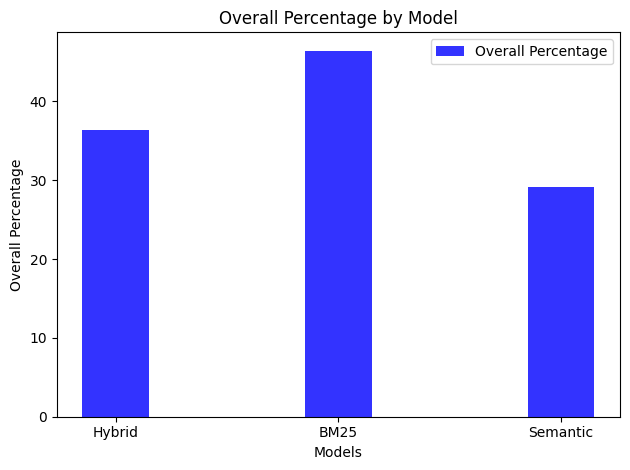

In [86]:
fig, ax = plt.subplots()
bar_width = 0.3
opacity = 0.8
index = np.arange(3)
rects1 = plt.bar(index, [overall_percentage, overall_percentage_bm_25, overall_percentage_semantic], bar_width, alpha=opacity, color='b', label='Overall Percentage')
plt.xlabel('Models')
plt.ylabel('Overall Percentage')
plt.title('Overall Percentage by Model')
plt.xticks(index, ['Hybrid', 'BM25', 'Semantic'])
plt.legend()
plt.tight_layout()
plt.show()

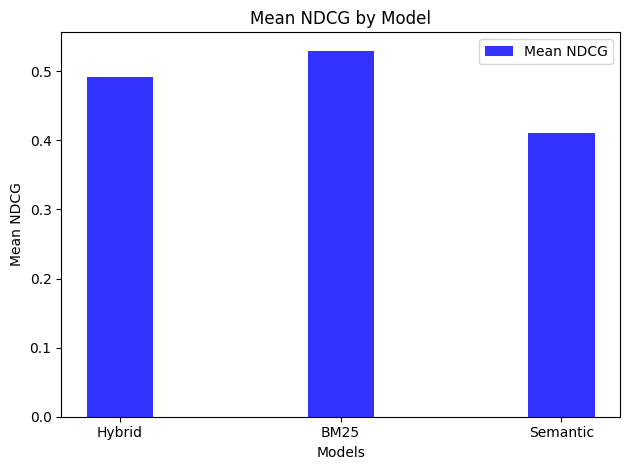

In [87]:
fig, ax = plt.subplots()
bar_width = 0.3
opacity = 0.8
index = np.arange(3)
rects1 = plt.bar(index, [mean_ndcg, mean_ndcg_bm_25, mean_ndcg_semantic], bar_width, alpha=opacity, color='b', label='Mean NDCG')
plt.xlabel('Models')
plt.ylabel('Mean NDCG')
plt.title('Mean NDCG by Model')
plt.xticks(index, ['Hybrid', 'BM25', 'Semantic'])
plt.legend()
plt.tight_layout()
plt.show()

## Teste 4 - BM25 + Hybrid/Semântico

In [1]:
import docker
from vespa.io import VespaResponse, VespaQueryResponse
from vespa.package import (
    ApplicationPackage,
    Field,
    Schema,
    Document,
    HNSW,
    RankProfile,
    Component,
    Parameter,
    FieldSet,
    GlobalPhaseRanking,
    Function,
)
from vespa.deployment import VespaDocker
import pandas as pd
import numpy as np

In [2]:
package = ApplicationPackage(
    name="hybridsearchbv",
    schema=[
        Schema(
            name="doc",
            document=Document(
                fields=[
                    Field(name="id", type="string", indexing=["summary"]),
                    Field(
                        name="title",
                        type="string",
                        indexing=["index", "summary"],
                        index="enable-bm25",
                    ),
                    Field(
                        name="authors",
                        type="string",
                        indexing=["index", "summary"],
                        index="enable-bm25",
                        bolding=True,
                    ),
                    Field(
                        name="description",
                        type="string",
                        indexing=["index", "summary"],
                        index="enable-bm25",
                        bolding=True,
                    ),
                    Field(
                        name="categories",
                        type="string",
                        indexing=["index", "summary"],
                        index="enable-bm25",
                        bolding=True,
                    ),
                    Field(
                        name="embedding",
                        type="tensor<float>(x[384])",
                        indexing=[
                            'input description . " " . input categories',
                            "embed",
                            "index",
                            "attribute",
                        ],
                        ann=HNSW(distance_metric="angular"),
                        is_document_field=False,
                    ),
                ]
            ),
            fieldsets=[FieldSet(name="default", fields=["title", "authors", "description", "categories"])],
            rank_profiles=[
                RankProfile(
                    name="bm25",
                    inputs=[("query(q)", "tensor<float>(x[384])")],
                    functions=[
                        Function(name="bm25sum", expression="bm25(description) + bm25(categories)")
                    ],
                    first_phase="bm25sum",
                ),
                RankProfile(
                    name="semantic",
                    inputs=[("query(q)", "tensor<float>(x[384])")],
                    first_phase="closeness(field, embedding)",
                ),
                RankProfile(
                    name="fusion",
                    inherits="bm25",
                    inputs=[("query(q)", "tensor<float>(x[384])")],
                    first_phase="closeness(field, embedding)",
                    global_phase=GlobalPhaseRanking(
                        expression="reciprocal_rank_fusion(bm25sum, closeness(field, embedding))",
                        rerank_count=1000,
                    ),
                ),
            ],
        )
    ],
    components=[
        Component(
            id="e5",
            type="hugging-face-embedder",
            parameters=[
                Parameter(
                    "transformer-model",
                    {
                        "url": "https://github.com/vespa-engine/sample-apps/raw/master/simple-semantic-search/model/e5-small-v2-int8.onnx"
                    },
                ),
                Parameter(
                    "tokenizer-model",
                    {
                        "url": "https://raw.githubusercontent.com/vespa-engine/sample-apps/master/simple-semantic-search/model/tokenizer.json"
                    },
                ),
            ],
        )
    ],
)

In [60]:
vespa_docker = VespaDocker()
app = vespa_docker.deploy(application_package=package)

Waiting for configuration server, 0/60 seconds...
Waiting for configuration server, 5/60 seconds...
Waiting for configuration server, 10/60 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 0/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 5/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 10/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 15/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Waiting for application status, 20/300 seconds...
Using plain http against endpoint http://localhost:8080/ApplicationStatus
Application is up!
Finished deployment.


In [62]:
df = pd.read_csv("https://raw.githubusercontent.com/bernardovma/dados_livros/main/data.csv")
df['id'] = range(1, len(df) + 1)
df = df.fillna("")
vespa_feed = df.apply(transform_row, axis=1).tolist()

app.feed_iterable(vespa_feed, schema="doc", namespace="bookrec", callback=callback)

In [131]:
teste_df = df.sample(n=100)
teste_df = teste_df[['title', 'description', 'categories']]

In [132]:
def query_semantic(input_query, top_titles):
    with app.syncio(connections=12) as session:
            query = input_query
            sanitized_titles = [title.replace("'", "") for title in top_titles]
            title_filter = " or ".join([f"title contains '{title}'" for title in sanitized_titles])
            select = f"select * from sources * where ({title_filter})"
            tg_hit = " and ({targetHits:1000}nearestNeighbor(embedding, q)) limit 10"
            response: VespaQueryResponse = session.query(
                yql = select + tg_hit,
                query=query,
                ranking="fusion",
                body={"input.query(q)": f"embed({query})"},
            )
            assert response.is_successful()

    return hits_as_df(response, ['id', 'title', 'authors', 'description', 'categories'])

def query_hybrid(input_query, top_titles):
    with app.syncio(connections=12) as session:
            query = input_query
            sanitized_titles = [title.replace("'", "") for title in top_titles]
            title_filter = " or ".join([f"title contains '{title}'" for title in sanitized_titles])
            select = f"select * from sources * where ({title_filter})"
            tg_hit = " and ({targetHits:1000}nearestNeighbor(embedding, q)) limit 10"
            response: VespaQueryResponse = session.query(
                yql = select + tg_hit,
                query=query,
                ranking="fusion",
                body={"input.query(q)": f"embed({query})"},
            )
            assert response.is_successful()

    return hits_as_df(response, ['id', 'title', 'authors', 'description', 'categories'])


In [133]:
results = {}
total_appearance_count = 0
total_questions = 0

In [141]:
if results:
    last_title = list(results.keys())[-1]
    last_book_data = results.pop(last_title)
    total_appearance_count -= last_book_data["appearance_count"]
    total_questions -= last_book_data["total_questions"]

start_index = len(results)
books_to_process = teste_df.iloc[start_index:]

for index, row in books_to_process.iterrows():
    title = row['title']
    print(f"Processing book: {title}")
    description = row['description']
    categories = row['categories']
    questions = generate_generic_questions_modified(title, description, categories)
    
    results[title] = {
        "questions": questions,
        "appearance_count": 0,
        "total_questions": len(questions),
        "relevance_scores": []
    }
    
    for question in questions:

        top_x_documents_bm_25 = query_bm25_initial(question, limit = 50)  
        top_x_titles_bm_25 = list(top_x_documents_bm_25['title'])
        
        search_results_hybrid = query_semantic(question, top_x_titles_bm_25)
        search_results_titles_hybrid = list(search_results_hybrid['title'])
        
        book_appears_hybrid = title in search_results_titles_hybrid
        results[title]["relevance_scores"].append(int(book_appears_hybrid))
        if book_appears_hybrid:
            results[title]["appearance_count"] += 1
    
    total_appearance_count += results[title]["appearance_count"]
    total_questions += results[title]["total_questions"]

Processing book: The Portable Faulkner
Processing book: Notre-Dame de Paris
Processing book: The End of the Affair
Processing book: Obasan
Processing book: Cod
Processing book: Ivanhoe
Processing book: On Being Ill
Processing book: The Miraculous Journey of Edward Tulane
Processing book: Naked Pictures of Famous People
Processing book: The Hannibal Lecter Trilogy
Processing book: The Sex Lives of Cannibals
Processing book: The Winter's Tale
Processing book: Blind Flight
Processing book: The Epic of Gilgamesh
Processing book: Hamlet, Prince of Denmark
Processing book: The Fateful Adventures of the Good Soldier Švejk During the World War, Book One
Processing book: Mystery Play
Processing book: Ruby Ann's Down Home Trailer Park Cookbook
Processing book: Floating Dragon
Processing book: The Complete Tales of Nikolai Gogol
Processing book: The Curtain
Processing book: Shakespeare's Sonnets
Processing book: Bravo Two Zero
Processing book: The Sixties
Processing book: The Governess
Processing

In [142]:
if total_questions > 0:
    overall_percentage = (total_appearance_count / total_questions) * 100
else:
    overall_percentage = 0

print(f"Overall percentage: {overall_percentage:.2f}%")

Overall percentage: 41.95%


In [143]:
ndcg_scores = {}
p = 10
for title, data in results.items():
    relevance_scores = data["relevance_scores"]
    ndcg_scores[title] = ndcg(relevance_scores, p)

mean_ndcg = np.mean(list(ndcg_scores.values()))
print(f"Mean NDCG@{p} across all books: {mean_ndcg:.4f}")

Mean NDCG@10 across all books: 0.5478


In [145]:
results_hybrid = {}
total_appearance_count_hybrid = 0
total_questions_hybrid = 0

In [152]:
if results_hybrid:
    last_title = list(results_hybrid.keys())[-1]
    last_book_data = results_hybrid.pop(last_title)
    total_appearance_count_hybrid -= last_book_data["appearance_count"]
    total_questions_hybrid -= last_book_data["total_questions"]

start_index = len(results_hybrid)
books_to_process = teste_df.iloc[start_index:]

for index, row in books_to_process.iterrows():
    title = row['title']
    print(f"Processing book: {title}")
    description = row['description']
    questions = llm_model.generate_generic_questions(title, description)
    
    results_hybrid[title] = {
        "questions": questions,
        "appearance_count": 0,
        "total_questions": len(questions),
        "relevance_scores": []
    }
    
    for question in questions:

        top_x_documents_bm_25 = query_bm25_initial(question, limit = 50)  
        top_x_titles_bm_25 = list(top_x_documents_bm_25['title'])
        
        search_results_hybrid = query_hybrid(question, top_x_titles_bm_25)
        search_results_titles_hybrid = list(search_results_hybrid['title'])
        
        book_appears_hybrid = title in search_results_titles_hybrid
        results_hybrid[title]["relevance_scores"].append(int(book_appears_hybrid))
        if book_appears_hybrid:
            results_hybrid[title]["appearance_count"] += 1
    
    total_appearance_count_hybrid += results_hybrid[title]["appearance_count"]
    total_questions_hybrid += results_hybrid[title]["total_questions"]

Processing book: Naked Pictures of Famous People
Processing book: The Hannibal Lecter Trilogy
Processing book: The Sex Lives of Cannibals
Processing book: The Winter's Tale
Processing book: Blind Flight
Processing book: The Epic of Gilgamesh
Processing book: Hamlet, Prince of Denmark
Processing book: The Fateful Adventures of the Good Soldier Švejk During the World War, Book One
Processing book: Mystery Play
Processing book: Ruby Ann's Down Home Trailer Park Cookbook
Processing book: Floating Dragon
Processing book: The Complete Tales of Nikolai Gogol
Processing book: The Curtain
Processing book: Shakespeare's Sonnets
Processing book: Bravo Two Zero
Processing book: The Sixties
Processing book: The Governess
Processing book: William Shakespeare's Twelfth Night
Processing book: The Ice Storm
Processing book: Development, Geography, and Economic Theory
Processing book: The Razor's Edge
Processing book: Europe and the People Without History
Processing book: Doctor Who


In [153]:
if total_questions > 0:
    overall_percentage_hybrid = (total_appearance_count_hybrid / total_questions_hybrid) * 100
else:
    overall_percentage_hybrid = 0

print(f"Overall percentage: {overall_percentage_hybrid:.2f}%")

Overall percentage: 29.78%


In [154]:
ndcg_scores_hybrid = {}
p = 10  
for title, data in results_hybrid.items():
    relevance_scores = data["relevance_scores"]
    ndcg_scores_hybrid[title] = ndcg(relevance_scores, p)

mean_ndcg_hybrid = np.mean(list(ndcg_scores_hybrid.values()))
print(f"Mean NDCG@{p} across all books: {mean_ndcg_hybrid:.4f}")

Mean NDCG@10 across all books: 0.4476
